# Text_Analysis

### Basic Text Analysis

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).


In [1]:
########################################################################
######################### Write your code here #########################
########################################################################

import glob
import os
os.chdir('/data')

book_files = glob.glob('./dataset/*.txt')

for book in book_files:
    file = open(book, 'r', encoding='utf-8')
    content = file.read()
    print(f"{book} {len(content)}")

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
./HW1_Dataset/The Odyssey by Homer (124).txt 697404
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 1154508
./HW1_

Modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed).

In [2]:
########################################################################
######################### Write your code here #########################
########################################################################

# Make an empty list
length = []

# Iterate over the book files to get their names and content lengths
for book in book_files:
    file = open(book, 'r', encoding='utf-8')
    content = file.read()  # Read the content of the file
    length.append((os.path.basename(book), len(content)))  # Store the file name and length of content

# Sort the books by their length in descending order
sorted_books = sorted(length, key=lambda x: x[1], reverse=True)

# Print out the top 15 books
for rank, (book, length) in enumerate(sorted_books[:15], start=1):
    print(f"{rank}. {length} {book}")

1. 5465100 The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 The King James Version of the Bible (132).txt
3. 3254333 Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 Ulysses by James Joyce (282).txt
8. 1378627 My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 Leviathan by Thomas Hobbes (417).txt
11. 1214387 The Republic by Plato (246).txt
12. 1200021 The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 The Iliad by Homer (256).txt
14. 1167141 The Federalist Papers by Alexander Hamilton and John Jay and James Madison (116).txt
15. 1154508 Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).tx

You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.


In [3]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [4]:
########################################################################
######################### Write your code here #########################
########################################################################

total_batches = 0

for book in book_files:
    file =  open(book, 'r', encoding='utf-8')
    content = file.read()
    batches = split_into_batches(content, 10000)
    total_batches += len(batches)

print(f"Total number of batches: {total_batches}")

Total number of batches: 1246


Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

In [5]:
########################################################################
######################### Write your code here #########################
########################################################################

import spacy
import re
import glob
from collections import Counter

# Load spaCy model with ner and parser disabled
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Initialize a Counter object to hold the term frequencies
term_freq_table = Counter()

# Iterate over each book
for book in book_files:
    file = open(book, 'r', encoding='utf-8')
    content = file.read()
    # Split the book into batches and process each batch
    for batch in split_into_batches(content, 10000):
        doc = nlp(batch)
        for token in doc:
            if token.is_alpha:  # Check if the token is alphabetic
                lemma = token.lemma_
                term_freq_table[lemma] += 1  # Update term frequency

# Sort the terms by frequency and print the top 50
for rank, (lemma, frequency) in enumerate(term_freq_table.most_common(50), start=1):
    print(f"{rank}. {lemma} ({frequency})")


1. the (702465)
2. and (435424)
3. be (430134)
4. of (386347)
5. to (324409)
6. I (255129)
7. a (233423)
8. in (204252)
9. he (193622)
10. that (159010)
11. have (158151)
12. it (135431)
13. his (108536)
14. you (102595)
15. with (101227)
16. they (97246)
17. not (95519)
18. for (95320)
19. as (90702)
20. she (78524)
21. but (75599)
22. my (73983)
23. do (68754)
24. at (64947)
25. on (62833)
26. by (61274)
27. this (61240)
28. we (60300)
29. which (58868)
30. all (58636)
31. say (58348)
32. from (50095)
33. so (47999)
34. or (47810)
35. her (42838)
36. one (41123)
37. man (39585)
38. their (38418)
39. what (37851)
40. no (37808)
41. there (37209)
42. will (34946)
43. if (34898)
44. go (33897)
45. when (33587)
46. an (32517)
47. come (32358)
48. see (32024)
49. who (30934)
50. would (30881)


Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

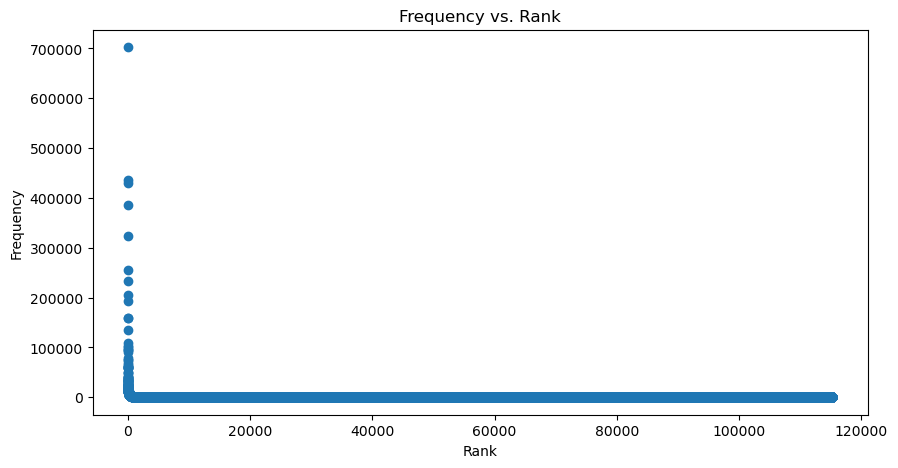

In [6]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
import matplotlib.pyplot as plt
import numpy as np

# Get the list of frequencies sorted from most to least frequent
frequencies = [freq for lemma, freq in term_freq_table.most_common()]
ranks = range(1, len(frequencies) + 1)

# Create a raw scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(ranks, frequencies)
plt.title('Frequency vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

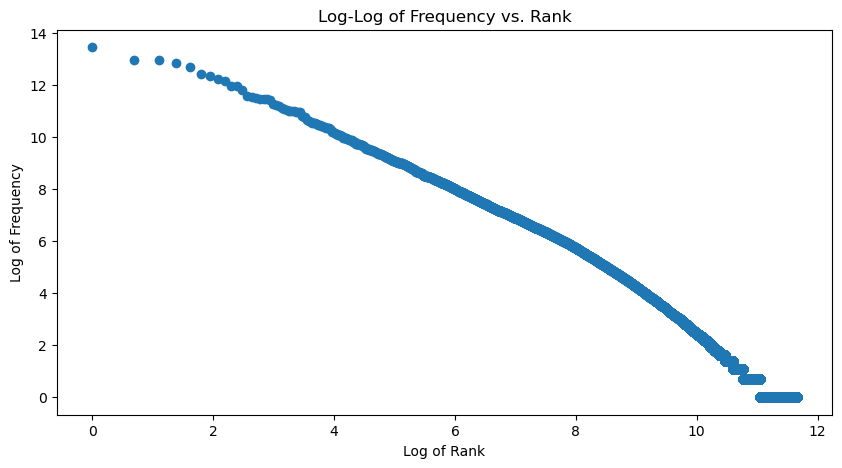

In [7]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################

# Create a log-log plot
plt.figure(figsize=(10, 5))
plt.scatter(np.log(ranks), np.log(frequencies))
plt.title('Log-Log of Frequency vs. Rank')
plt.xlabel('Log of Rank')
plt.ylabel('Log of Frequency')
plt.show()

Let's now try to make sense of the very last plot in part. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:
What do you observe in the log-log plot above? Is this consist with the power law?

The log-log value decreases with increase in rank which resonates with the power law. This can also be seen by the decreasing slope suggesting the inverse relation. 
This also suggests consistency with the zipf function which has an exponential decay and hence we can say that this is consistent with the power law.

Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [8]:
# Total number of words in the corpus
total_words = sum(term_freq_table.values())

# Sum the frequencies of the top 4 lemmas
top_4_freq = sum(freq for lemma, freq in term_freq_table.most_common(4))

# Sum the frequencies of the top 50 lemmas
top_50_freq = sum(freq for lemma, freq in term_freq_table.most_common(50))


print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################

prob_top_4 = top_4_freq / total_words
print(prob_top_4)

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################

prob_top_50 = top_50_freq / total_words
print(prob_top_50)

Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.1617945563375985
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.480906268732929


What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [9]:
# Number of lemmas that occur only once
num_lemmas_once = sum(1 for lemma, freq in term_freq_table.items() if freq == 1)

# Number of lemmas that occur fewer than 10 times
num_lemmas_fewer_than_10 = sum(1 for lemma, freq in term_freq_table.items() if freq < 10)

# Total number of unique lemmas
total_unique_lemmas = len(term_freq_table)

print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################

prop_lemmas_once = num_lemmas_once / total_unique_lemmas
print(prop_lemmas_once)

print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################

prop_lemmas_fewer_than_10 = num_lemmas_fewer_than_10 / total_unique_lemmas
print(prop_lemmas_fewer_than_10)

Occur only once: 
0.455335913500755
Occur fewer than 10 times: 
0.7878911470174769


### Entity Recognition and Pointwise Mutual Information (PMI)
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

/Users/siddhesh/opt/anaconda3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


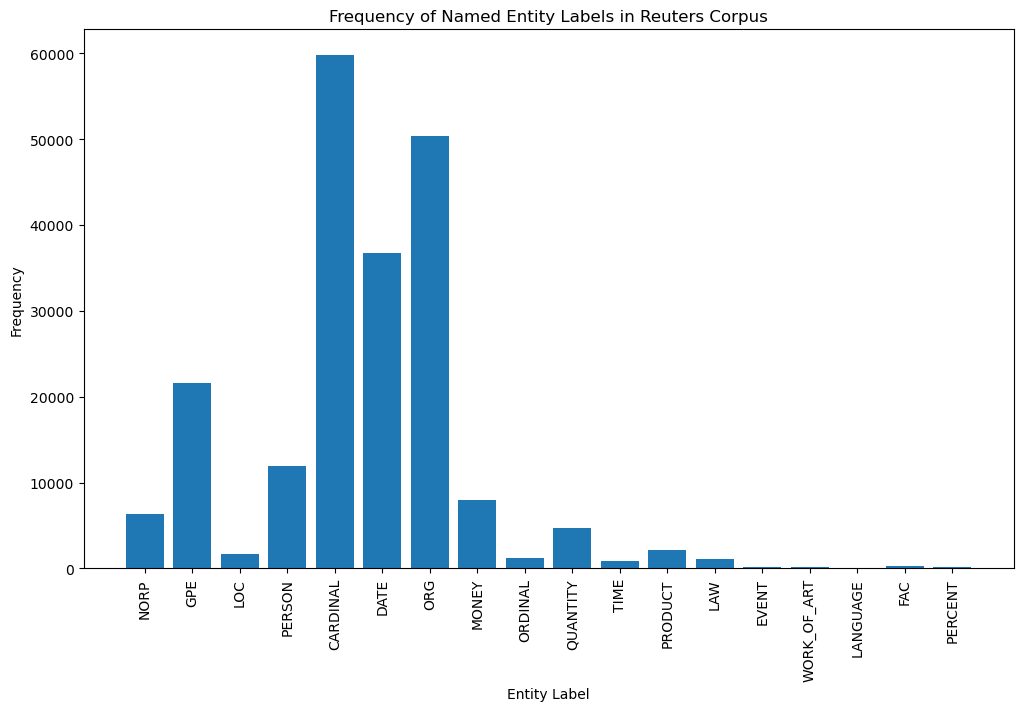

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################

# Iterate over the processed documents and count the entity labels
for doc in reuters_nlp:
    for ent in doc.ents:
        label_counter[ent.label_] += 1

# Prepare the data for plotting
labels, frequencies = zip(*label_counter.items())
indices = range(len(labels))

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(indices, frequencies, align='center')
plt.xticks(indices, labels, rotation='vertical')
plt.xlabel('Entity Label')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity Labels in Reuters Corpus')
plt.show()

Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [11]:
########################################################################
######################### Write your code here #########################
########################################################################

from collections import Counter

# Initialize Counter objects for ORG and GPE entities
org_counter = Counter()
gpe_counter = Counter()

# Iterate over the processed documents
for doc in reuters_nlp:
    # Initialize sets to track unique entities for the current document
    org_entities = set()
    gpe_entities = set()

    # Extract entities and update the corresponding set
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            org_entities.add(ent.text.lower())
        elif ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())

    # Update the counters with the unique entities from this document
    org_counter.update(org_entities)
    gpe_counter.update(gpe_entities)

# Get the top 10 most common ORG and GPE entities
top_10_org = org_counter.most_common(10)
top_10_gpe = gpe_counter.most_common(10)

print('Top 10 most frequently occuring entities with label ORG')
print(top_10_org)

print('Top 10 most frequently occuring entities with label GPE')
print(top_10_gpe)


Top 10 most frequently occuring entities with label ORG
[('cts', 1115), ('reuters', 444), ('the securities and exchange commission', 248), ('ec', 231), ('fed', 230), ('treasury', 228), ('cts net', 179), ('the u.s. agriculture department', 170), ('usda', 154), ('the bank of england', 143)]
Top 10 most frequently occuring entities with label GPE
[('u.s.', 1631), ('japan', 579), ('the united states', 383), ('u.k.', 297), ('canada', 295), ('new york', 251), ('west germany', 236), ('washington', 230), ('london', 216), ('brazil', 201)]


Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [12]:
########################################################################
######################### Write your code here #########################
########################################################################

from collections import Counter
from math import log

# Initialize Counter objects for GPE entities and co-occurrences with 'opec'
gpe_counter = Counter()
opec_counter = Counter()
gpe_opec_cooccurrence = Counter()

# Count the number of documents containing 'opec'
num_docs_with_opec = 0

# Iterate over the processed documents
for doc in reuters_nlp:
    # Track if 'opec' is in the current document
    has_opec = False

    # Initialize a set to track unique GPE entities for the current document
    gpe_entities = set()

    # Extract entities and update the corresponding set
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())
        if ent.text.lower() == 'opec':
            has_opec = True
            num_docs_with_opec += 1

    # Update the counters with the unique entities from this document
    gpe_counter.update(gpe_entities)

    if has_opec:
        opec_counter.update(gpe_entities)

# Total number of documents
num_docs = len(reuters_nlp)


# Source: GPT4, referred GPT for writing below part of code.
# Calculate PMI for each GPE with 'opec'
gpe_pmi = {}
for gpe in gpe_counter:
    p_gpe = gpe_counter[gpe] / num_docs
    p_opec = num_docs_with_opec / num_docs
    p_gpe_and_opec = opec_counter[gpe] / num_docs
    if p_gpe_and_opec > 0:  # Avoid log(0) and division by zero
        pmi = log(p_gpe_and_opec / (p_gpe * p_opec), 2)
        gpe_pmi[gpe] = pmi

# Sort the GPEs by PMI in decreasing order and get the top 50
top_50_gpe_pmi = sorted(gpe_pmi.items(), key=lambda x: x[1], reverse=True)[:50]

print('Top 50 GPE entities')
print(top_50_gpe_pmi)

Top 50 GPE entities
[('brent', 4.428473013040396), ('ula fields', 4.428473013040396), ('emirates', 4.428473013040396), ('the lake charles', 4.428473013040396), ('bethesda', 4.428473013040396), ('franco', 4.428473013040396), ('gabon', 4.428473013040396), ('opec', 4.428473013040396), ('saudi arabia reiterates commitment to', 4.428473013040396), ('yanbu', 4.428473013040396), ('el salado', 4.428473013040396), ('aguarico', 4.428473013040396), ('ras tanurah', 4.428473013040396), ("ju'aymah", 4.428473013040396), ('jubail', 4.428473013040396), ('tripoli', 4.428473013040396), ('doha', 4.428473013040396), ('guayaquil', 4.428473013040396), ('tihamah', 4.428473013040396), ('redoglia', 4.428473013040396), ('carrington', 4.428473013040396), ('materialy', 4.428473013040396), ('vienna', 4.194007759403372), ('riyadh', 4.106544918153033), ("saudi arabia's", 3.8879046316776926), ('balao', 3.843510512319239), ('quito', 3.843510512319239), ('qatar', 3.6349238905078214), ('dubai', 3.621118090982791), ('cara

The above PMI results draw a relationship between the different countries represented as geopolitical entities and OPEC. OPEC consists of serveral countries which control the supply of crude oil into the world. From the PMI data, we observe that the countries which are a part of OPEC have a high PMI values. The same can be seen for countries like Emirates and United Arab Emirates having high PMI values. Crude oil is also referred as brent which resonates with its high PMI value.
The output is not very accurate as there are some variables in the output which are not related to OPEC but still have high PMI values. This might be because those are randomly present in the article and have high occurence.